# Gradiend Descent

we’ll be trying to the find the best model for a certain situation. And usually “best” will mean something like “minimizes the error of the model” or “maximizes the likelihood of the data.”

In [23]:
def sum_of_squares(v):
    """Compute the sum of suered elements in v"""
    
    return sum(v_i ** 2 for v_i in v)

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

In [24]:
v = [v for v in  range(10)]

print(sum_of_suqers(v))

285


### Using the gradient

In [25]:
import random
from linear_algebra import distance

def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

v = [random.randint(-10,10) for i in range(3)]

tolerance = 0.0000001

while True:
    #print v, sum_of_squares(v)
    gradient = sum_of_squares_gradient(v)   # compute the gradient at v
    next_v = step(v, gradient, -0.01)       # take a negative gradient step
    if distance(next_v, v) < tolerance:     # stop if we're converging
        break
    v = next_v                              # continue if we're not

print("minimum v", v)
print("minimum value", sum_of_squares(v))
print()

minimum v [0.0, -1.8504895687443374e-06, 4.626223921860849e-06]
minimum value 2.4826259419229176e-11



In [42]:
def difference_quotient(f, x, h):
    return (f(x+h) - f(x)) / h

For many functions it’s easy to exactly calculate derivatives. For example, the square function:

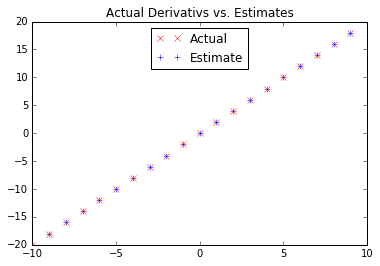

In [48]:
def square(x):
    return x*x

def derivative(x):
    return 2 * x

derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

%matplotlib inline
import matplotlib.pyplot as plt

x = list(range(-10, 10))

plt.title("Actual Derivativs vs. Estimates")
plt.plot(x, list(map(derivative, x)), 'rx', label="Actual")
plt.plot(x, list(map(derivative_estimate, x)), 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple partial derivatives, each indicating how f changes when we make small changes in just one of the input variables.
We calculate its ith partial derivative by treating it as a function of just its ith variable, holding the other variables fixed:

In [49]:
def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v 
         for j, v_j in enumerate(v)]
    
    return (f(w) - f(v)) / h

In [51]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]